# LSTM architecture - recursive

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from itertools import product

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_18112\2166384446.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Read data and define input and output
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Dataset_scaled_denoised.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[1:,:9]

In [4]:
# Prepare input and output sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length])
        y.append(data.iloc[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 20  # Define the sequence length
X_seq, y_seq = create_sequences(X, seq_length)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [5]:
# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(y_train.shape[1])  # Output layer with number of neurons equal to number of output features
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/10

2880/2880 [==============================] - 16s 5ms/step - loss: 0.0065 - val_loss: 2.5661e-04
Epoch 2/10
2880/2880 [==============================] - 15s 5ms/step - loss: 1.3432e-04 - val_loss: 2.0512e-04
Epoch 3/10
2880/2880 [==============================] - 14s 5ms/step - loss: 1.0561e-04 - val_loss: 3.4501e-04
Epoch 4/10
2880/2880 [==============================] - 14s 5ms/step - loss: 6.1313e-05 - val_loss: 1.6693e-04
Epoch 5/10
2880/2880 [==============================] - 15s 5ms/step - loss: 6.5704e-05 - val_loss: 1.7103e-04
Epoch 6/10
2880/2880 [==============================] - 13s 5ms/step - loss: 4.7384e-05 - val_loss: 1.7369e-04
Epoch 7/10
2880/2880 [==============================] - 13s 5ms/step - loss: 3.1231e-05 - val_loss: 1.6805e-04
Epoch 8/10
2880/2880 [==============================] - 13s 5ms/step - loss: 3.8814e-05 - val_loss: 1.6064e-04
Epoch 9/10
2880/2880 [==============================] - 13s 5ms/step - loss: 3.6693e-05 - val_loss: 1.5978e-04
Ep

1/1 [==============================] - 0s 20ms/step
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


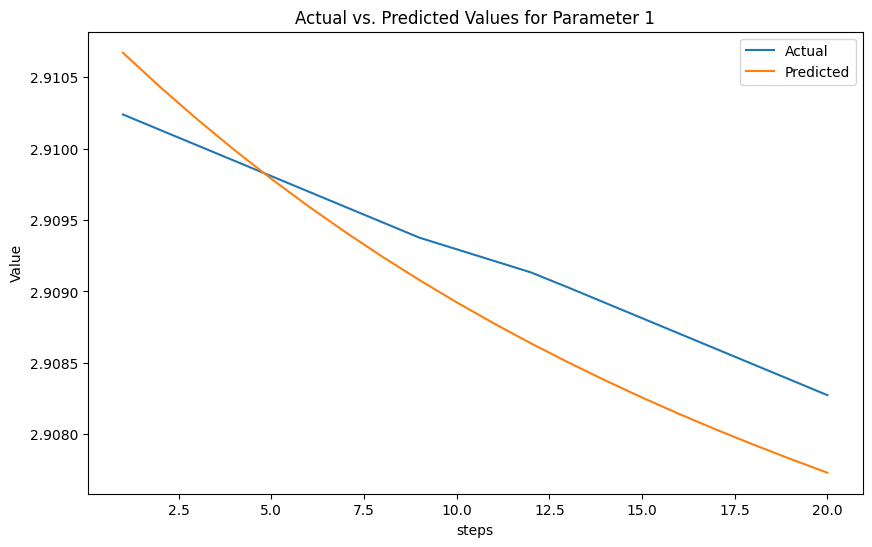

In [22]:
# Make recursive predictions
# n_predictions = 20  # Number of predictions to make
initial_index = 0  # Initial index to start recursion
X_rec = X_seq[initial_index:initial_index + seq_length]  # Initial input sequence for recursion
# predictions = []


y_pred = model.predict(X_rec)


array = []
for i in range(len(y_pred)):
    array.append(i+1)

print(array)

plt.figure(figsize=(10, 6))
plt.plot(array,y_seq[20:40, 0], label='Actual')
plt.plot(array,y_pred[:, 0], label='Predicted')
plt.xlabel('steps')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values for Parameter 1')
plt.legend()
plt.show()
# for _ in range(n_predictions):
#     # Predict the next timestep
#     y_pred = model.predict(np.expand_dims(X_rec[-1], axis=0))
    
#     # Append the predicted value to the input sequence
#     X_rec = np.concatenate((X_rec, np.expand_dims(y_pred, axis=1)), axis=0)
    
#     # Discard the oldest value from the input sequence
#     X_rec = X_rec[1:]
    
#     # Append the predicted value to the list of predictions
#     predictions.append(y_pred)

# # Convert list of predictions to numpy array
# predictions = np.array(predictions)

# # Plot recursive predictions
# plt.figure(figsize=(10, 6))
# plt.plot(y_seq[initial_index:initial_index + n_predictions, 0], label='Actual')
# plt.plot(predictions[:, 0, 0], label='Predicted')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Recursive Predictions for Parameter 1')
# plt.legend()
# plt.show()


